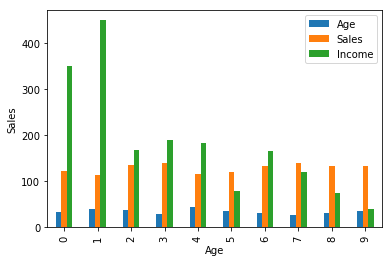

In [3]:
# import pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt 
  
# create 2D array of table given above 
data = [['E001', 'M', 34, 123, 'Normal', 350], 
        ['E002', 'F', 40, 114, 'Overweight', 450], 
        ['E003', 'F', 37, 135, 'Obesity', 169], 
        ['E004', 'M', 30, 139, 'Underweight', 189], 
        ['E005', 'F', 44, 117, 'Underweight', 183], 
        ['E006', 'M', 36, 121, 'Normal', 80], 
        ['E007', 'M', 32, 133, 'Obesity', 166], 
        ['E008', 'F', 26, 140, 'Normal', 120], 
        ['E009', 'M', 32, 133, 'Normal', 75], 
        ['E010', 'M', 36, 133, 'Underweight', 40] ] 
  
# dataframe created with 
# the above data array 
df = pd.DataFrame(data, columns = ['EMPID', 'Gender',  
                                    'Age', 'Sales', 
                                    'BMI', 'Income'] ) 
  
# Dataframe of previous code is used here 
  
# Plot the bar chart for numeric values 
# a comparison will be shown between 
# all 3 age, income, sales 
df.plot.bar() 
  
# plot between 2 attributes 
plt.bar(df['Age'], df['Income']) 
plt.xlabel("Age") 
plt.ylabel("Sales") 
plt.show() 

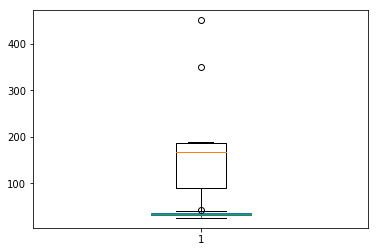

In [4]:
# For each numeric attribute of dataframe 
df.plot.box() 
  
# individual attribute box plot 
plt.boxplot(df['Income']) 
plt.show() 

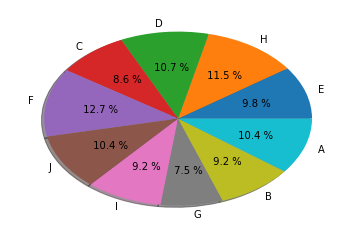

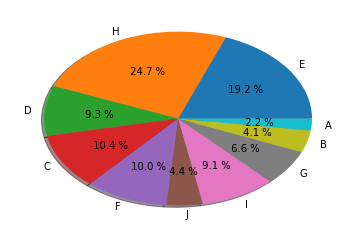

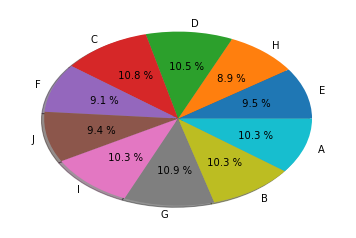

In [5]:
plt.pie(df['Age'], labels = {"A", "B", "C", 
							"D", "E", "F", 
							"G", "H", "I", "J"}, 
							
autopct ='% 1.1f %%', shadow = True) 
plt.show() 

plt.pie(df['Income'], labels = {"A", "B", "C", 
								"D", "E", "F", 
								"G", "H", "I", "J"}, 
								
autopct ='% 1.1f %%', shadow = True) 
plt.show() 

plt.pie(df['Sales'], labels = {"A", "B", "C", 
							"D", "E", "F", 
							"G", "H", "I", "J"}, 
autopct ='% 1.1f %%', shadow = True) 
plt.show() 


In [7]:
# scatter plot between income and age 
plt.scatter(df['income'], df['age']) 
plt.show() 
  
# scatter plot between income and sales 
plt.scatter(df['income'], df['sales']) 
plt.show() 
  
# scatter plot between sales and age 
plt.scatter(df['sales'], df['age']) 
plt.show() 

KeyError: 'income'

Estimated coefficients:
b_0 = 1.2363636363636363     
b_1 = 1.1696969696969697


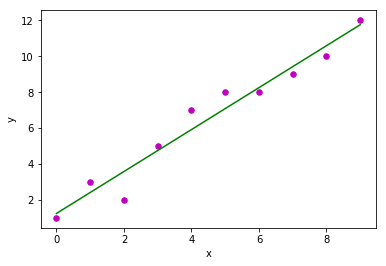

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \
    \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

Coefficients: 
 [ -8.80740828e-02   6.72507352e-02   5.10280463e-02   2.18879172e+00
  -1.72283734e+01   3.62985243e+00   2.13933641e-03  -1.36531300e+00
   2.88788067e-01  -1.22618657e-02  -8.36014969e-01   9.53058061e-03
  -5.05036163e-01]
Variance score: 0.720898784610889


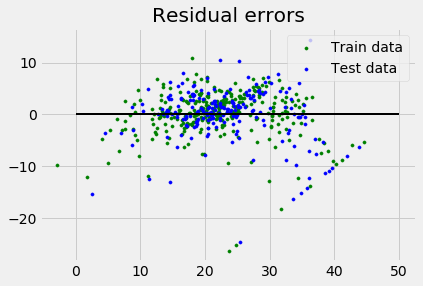

In [16]:
#multiple regression
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
  
# load the boston dataset 
boston = datasets.load_boston(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 